setting up wave functions...


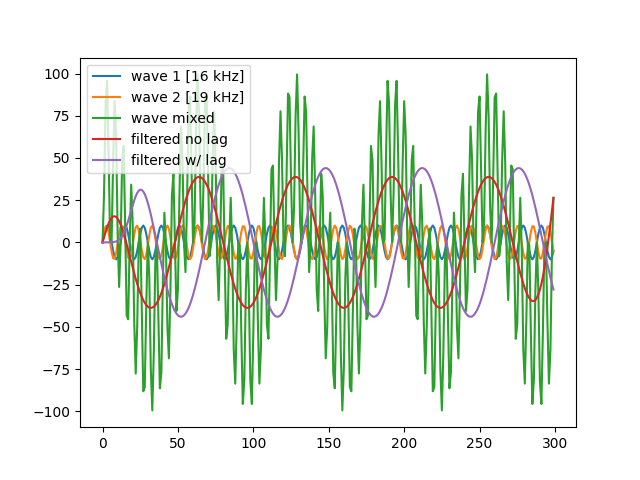

In [3]:
!python "wavefunctions.py"
%matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wavefunctions import GenerateSinewavePoints, GenerateSinewavePeriods
#from scipy.signal import kaiserord, lfilter, firwin, freqz
import scipy.signal as signal
import math
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter


sampleRate = 192000

wave1 = GenerateSinewavePoints(sampleRate, 16000, 10, 0, 300)
wave2 = GenerateSinewavePoints(sampleRate, 19000, 10, 0, 300)
waveMult = wave1 * wave2

firFilter = signal.firwin(41, cutoff = 4000, window = "blackmanharris", pass_zero = "lowpass", fs=sampleRate)
waveFilteredNoLag = signal.filtfilt(firFilter, 1, waveMult)
waveFilteredLag = signal.lfilter(firFilter, 1, waveMult)

fig = plt.figure()
#plt.ticklabel_format(useOffset=None)
plt.plot(wave1, label="wave 1 [16 kHz]")
plt.plot(wave2, label="wave 2 [19 kHz]")
plt.plot(waveMult, label="wave mixed")
plt.plot(waveFilteredNoLag, label="filtered no lag")
plt.plot(waveFilteredLag, label="filtered w/ lag")

plt.legend()


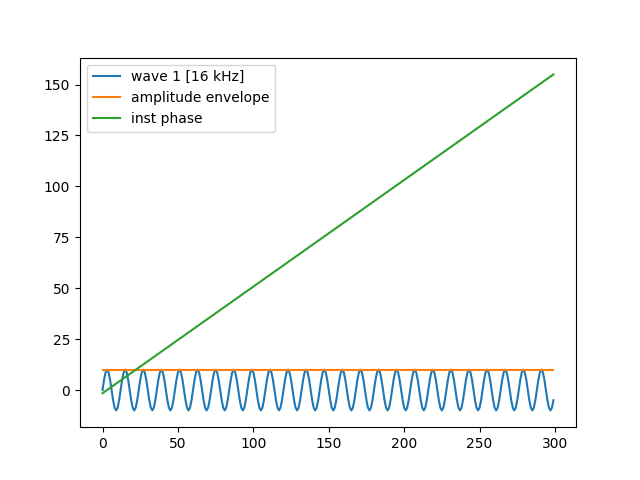

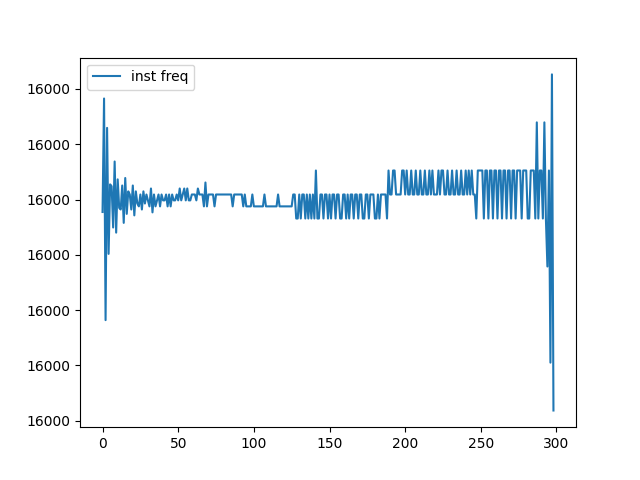

In [4]:
#hilbert transfor gives I and Q
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html
analytic_signal = signal.hilbert(wave1)#returns array of imaginary numbers, where real = I (in-phase) and imaginary = Q (quadrature, 90 deg out of phase)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))#this gives a continuously increasing phase angle in radians (somehow), that doesn't wrap when the period ends
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * sampleRate)

fig = plt.figure()
plt.plot(wave1, label="wave 1 [16 kHz]")
plt.plot(amplitude_envelope, label="amplitude envelope")
plt.plot(instantaneous_phase, label="inst phase")
plt.legend()

fig2 = plt.figure()
plt.plot(instantaneous_frequency, label="inst freq")
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax.get_yaxis().get_major_formatter().set_useOffset(False)#disable the stupid "offset" that makes the y axis hard to read, note that the labels can get cut off unless the chart is expanded
plt.legend()